## Problema 2:
Se tiene una barra delgada de aluminio, originalmente a 0o C, cuyos extremos se someten
repentinamente a temperaturas fijas. El extremo izquierdo se mantiene a una temperatura constante de
100ºC y el derecho a 50ºC. Utilice los métodos explícito e implícito (Crank-Nicolson) de diferencias
finitas para calcular la evolución de la distribución de temperaturas en función del tiempo. Tome que
la barra tiene 10 cm de longitud y k = 0.835 cm2/s (aluminio). Haga los cálculos para Δx = 2 cm y x = 2 cm y
Δx = 2 cm y t = 0.1 seg. Repítalos para Δx = 2 cm y t = 5 seg y compare sus resultados. Analice el comportamiento de la
solución para los distintos regímenes.

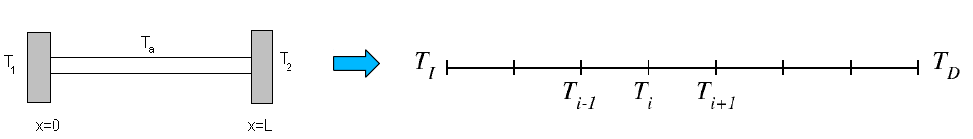

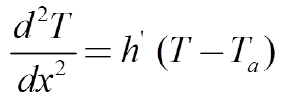 
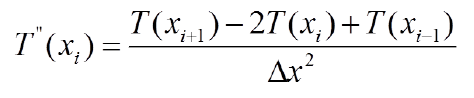
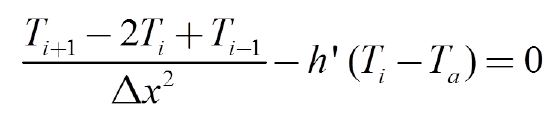
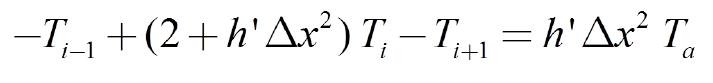
Notar como son N ecuaciones acopladas,
una para cada i
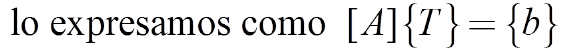

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

#Datos del problema

Ti = [100, 50]   #Temperaturas inciales [izq, der]
L = 10           #Barra 10 cm de longitud
k = 0.835        #[cm**2/s] aluminio

delta_t = 0.1
t_tot = 0.5        #Tiempo total [s]
tiempo = np.arange(0, t_tot, delta_t)           
h = k*delta_t

delta_x = 2     
Nx = (L//delta_x)+1  #Cantidad de nodos
Ta = 0*np.ones([Nx])           #Temperatura inicial de la barra sin los bordes

M = np.eye(Nx, Nx)
b = np.zeros(Nx)
Temp = []

In [2]:
#Matriz: 
#Empiezo desde 1, dejo afuera los bordes


for t in tiempo: 
    for k in range(1, Nx-1): #Recorro la diagonal                
        M[k, k-1]= -1
        M[k, k]= (2 + h*(delta_x**2))
        M[k, k+1]= -1

    for k in range(0, Nx):
        if k==0:
            b[k] = Ti[k]
        elif k == Nx-1:
            b[k] = Ti[1]
        else:
            b[k] = h*(delta_x**2)*Ta[k]
        
    #Resuelvo las temperaturas
    T = np.linalg.solve(M, b)
    Temp.append(T)
    Ta = copy.copy(T)

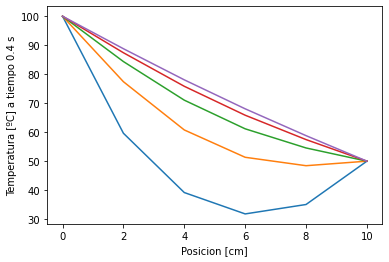

In [14]:
#Graficos

for i in range(len(tiempo)):
    x = np.arange(0, L+1, delta_x)
    plt.figure(1)
    
    ax = plt.plot(x, Temp[i])
    #plt.show()
    plt.xlabel('Posicion [cm]')
    plt.ylabel(f'Temperatura [ºC] a tiempo {delta_t*i} s')
    plt.ion()
    time.sleep(1)
    #plt.close(1)
    #plt.clf()
    #ax.remove(1)
    

(0.0, 1.0)

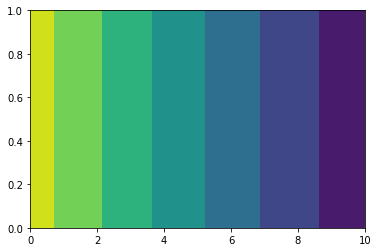

In [8]:
#Grafico de contornos
X = np.zeros([3, Nx])
T1 = np.zeros([Nx, Nx])
X[:,] = x
T1[:,] = T
[X, Y] = np.meshgrid(x, x)
plt.contourf(X, Y, T1)
plt.ylim(0,1)
